## Text Mining & Image Recognition
### Laboratorio # 1

#### Herbert Rafael Reyes Portillo
#### Carnet: 23002116

Instrucciones: A continuacion vera una lista de ejercicios que debe completar para poder entregar el laboratorio #1. Para desarrollar su solucion debera utilizar un Notebook el cual contenga todos los ejercicios indicando cada uno de ellos explicitamente con sus resultados. Para la entrega debera subir un link al repositorio de github el cual contiene su solucion.

### Problema 1:
Desarrolle una funcion la cual reciba dos par´ametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color seg´un los siguientes
puntos:
- Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
- Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
- Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
- Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y
verde.
- Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y
azul.
- Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y rojo.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

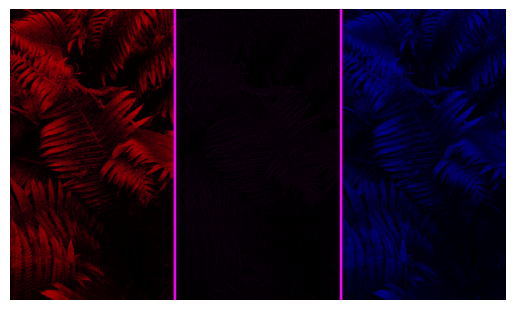

In [37]:
def activar_canales_color(parametro, imagen):

    #Obteniendo los canales de color
    b_channel, g_channel, r_channel = cv2.split(imagen)

    #Opciones de color 
    
    color_options = {
        1: (b_channel, np.zeros_like(g_channel), np.zeros_like(r_channel)),
        2: (np.zeros_like(b_channel), g_channel, np.zeros_like(r_channel)),
        3: (np.zeros_like(b_channel), np.zeros_like(g_channel), r_channel),
        10: (np.zeros_like(b_channel), g_channel, r_channel),
        20: (b_channel, g_channel, np.zeros_like(r_channel)),
        30: (b_channel, np.zeros_like(g_channel), r_channel),
    }


    opcion = color_options.get(parametro)

    if opcion is None:
        print("Opción de color no válida. Selecciona un valor valido.")
        return None

    opcion = [channel.astype(np.uint8) for channel in opcion]
    nueva_imagen = cv2.merge(opcion)
    if nueva_imagen is not None:
        salida_rgb = cv2.cvtColor(nueva_imagen, cv2.COLOR_BGR2RGB)

        plt.imshow(salida_rgb)
        plt.axis('off')
        plt.show()


entrada = cv2.imread("./Ejercicio1.jpg")

activar_canales_color(30,entrada)



## Problema 2:
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se construya la imagen original a color.

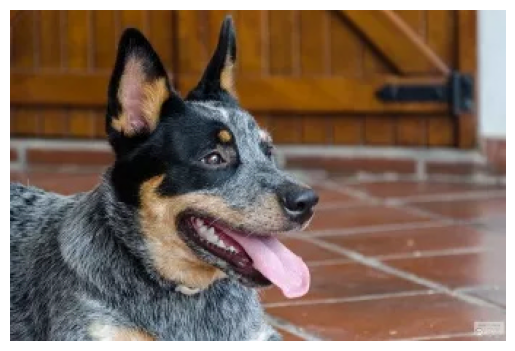

In [39]:
def construir_imagen_color(imagen_r, imagen_g, imagen_b):


    if not (imagen_r.shape == imagen_g.shape == imagen_b.shape):
        print("Las imágenes no tienen el mismo tamaño.")
        return None
    #Uniendo las imagenes 
    
    imagen_color = cv2.merge((imagen_b, imagen_g, imagen_r))

    if imagen_color is not None:
        imagen_color_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

        plt.imshow(imagen_color_rgb)
        plt.axis('off')
        plt.show()


#imagen_r = cv2.imread("./imagen1/imagen1_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
#imagen_g = cv2.imread("./imagen1/imagen1_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
#imagen_b = cv2.imread("./imagen1/imagen1_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

#imagen_r = cv2.imread("./imagen2/imagen2_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
#imagen_g = cv2.imread("./imagen2/imagen2_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
#imagen_b = cv2.imread("./imagen2/imagen2_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

imagen_r = cv2.imread("./imagen3/perro_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
imagen_g = cv2.imread("./imagen3/perro_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
imagen_b = cv2.imread("./imagen3/perro_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)


construir_imagen_color(imagen_r, imagen_g, imagen_b)





## Problema 3:
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

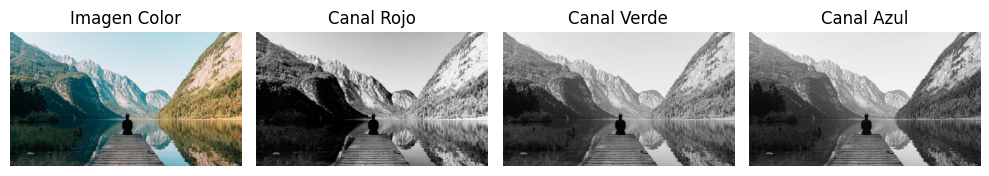

In [35]:
def crear_escala_grises_3d(imagen_color):
    imagen_color = cv2.imread(imagen_color)
    #Obteniendo los canales de color de la imagen
    blue_channel, green_channel, red_channel = cv2.split(imagen_color)

    #Copiando los canales de color
    imagen_r = red_channel.copy()
    imagen_g = green_channel.copy()
    imagen_b = blue_channel.copy()

    #Creando en escala de grises 
    
    imagen_r[:, :] = red_channel
    imagen_g[:, :] = green_channel
    imagen_b[:, :] = blue_channel

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Color')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(imagen_r, cmap='gray')
    plt.title('Canal Rojo')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(imagen_g, cmap='gray')
    plt.title('Canal Verde')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(imagen_b, cmap='gray')
    plt.title('Canal Azul')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


crear_escala_grises_3d("./Ejercicio3.jpg")





## Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una linea vertical la cual muestre el valor de la media de la distribucion.

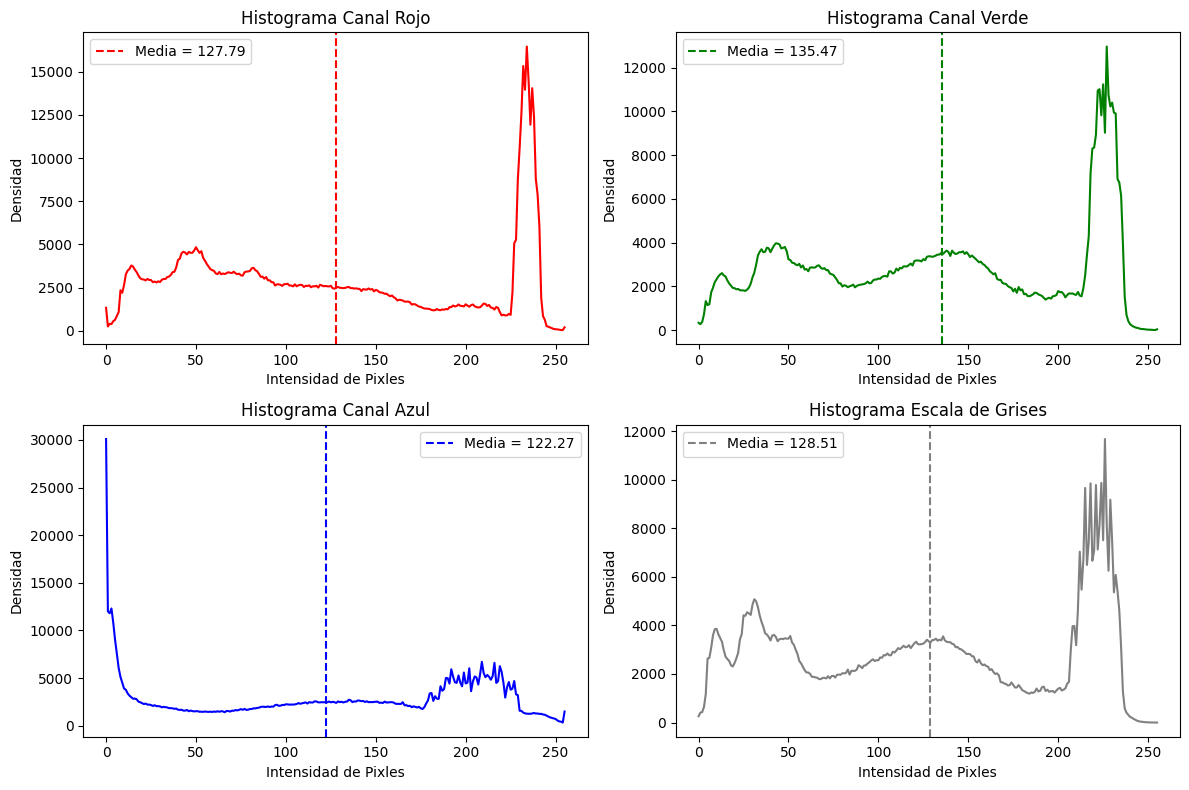

In [32]:
def histograma_y_media(imagen):
    
    #Histogramas canal de color
    hist_r, bin_edges_r = np.histogram(imagen[:, :, 0].flatten(), bins=256, range=[0, 256])
    hist_g, bin_edges_g = np.histogram(imagen[:, :, 1].flatten(), bins=256, range=[0, 256])
    hist_b, bin_edges_b = np.histogram(imagen[:, :, 2].flatten(), bins=256, range=[0, 256])

    #Calculo de promedios

    promedio_r = np.mean(imagen[:, :, 0])
    promedio_g = np.mean(imagen[:, :, 1])
    promedio_b = np.mean(imagen[:, :, 2])

    #Imagen en escala de grises
    imagen_gris = np.mean(imagen, axis=2)

    #Calculo de histograma y promedio

    hist_gris, bin_edges_gris = np.histogram(imagen_gris.flatten(), bins=256, range=[0, 256])

    promedio_gris = np.mean(imagen_gris)

    
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(hist_r, color='red')
    plt.axvline(x=promedio_r, color='red', linestyle='--', label='Media = {:.2f}'.format(promedio_r))
    plt.title('Histograma Canal Rojo')
    plt.xlabel('Intensidad de Pixles')
    plt.ylabel('Densidad')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(hist_g, color='green')
    plt.axvline(x=promedio_g, color='green', linestyle='--', label='Media = {:.2f}'.format(promedio_g))
    plt.title('Histograma Canal Verde')
    plt.xlabel('Intensidad de Pixles')
    plt.ylabel('Densidad')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(hist_b, color='blue')
    plt.axvline(x=promedio_b, color='blue', linestyle='--', label='Media = {:.2f}'.format(promedio_b))
    plt.title('Histograma Canal Azul')
    plt.xlabel('Intensidad de Pixles')
    plt.ylabel('Densidad')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(hist_gris, color='gray')
    plt.axvline(x=promedio_gris, color='gray', linestyle='--', label='Media = {:.2f}'.format(promedio_gris))
    plt.title('Histograma Escala de Grises')
    plt.xlabel('Intensidad de Pixles')
    plt.ylabel('Densidad')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Cargando imagen
imagen = cv2.imread("./Ejercicio3.jpg")

# Mostrar los histogramas 
histograma_y_media(imagen)